In [1]:
import networkx as nx
import os
import matplotlib.pyplot as plt
import collections
import numpy as np 
import random



In [2]:
def load_gml_files(folder_path, file_list):
    """
    Reads specific GML files from a directory and returns a dictionary of graphs.
    """
    graphs = {}
    
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        
        # Check if file exists before trying to read
        if os.path.exists(file_path):
            print(f"Loading: {file_name}...")
            # nx.read_gml is the standard reader for these files
            graphs[file_name] = nx.read_gml(file_path)
        else:
            print(f"Warning: {file_name} not found in {folder_path}")
            
    return graphs


In [3]:
# --- Configuration ---
# Update this path to match your Windows folder structure from the screenshot
data_folder = r'C:\Users\TEMMMAR\Desktop\M2 TRIED\projet Graph\fb100\data'

# Example: Choosing 3 files by name as requested
files_to_load = ['Caltech36.gml', 'MIT8.gml', 'Johns Hopkins55.gml']

# Execute the loader
my_graphs = load_gml_files(data_folder, files_to_load)

# Verify the results
for name, G in my_graphs.items():
    print(f"Graph {name} loaded with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Loading: Caltech36.gml...


Loading: MIT8.gml...
Loading: Johns Hopkins55.gml...
Graph Caltech36.gml loaded with 769 nodes and 16656 edges.
Graph MIT8.gml loaded with 6440 nodes and 251252 edges.
Graph Johns Hopkins55.gml loaded with 5180 nodes and 186586 edges.


Processing layout for Caltech36.gml...
Processing layout for MIT8.gml...
Processing layout for Johns Hopkins55.gml...


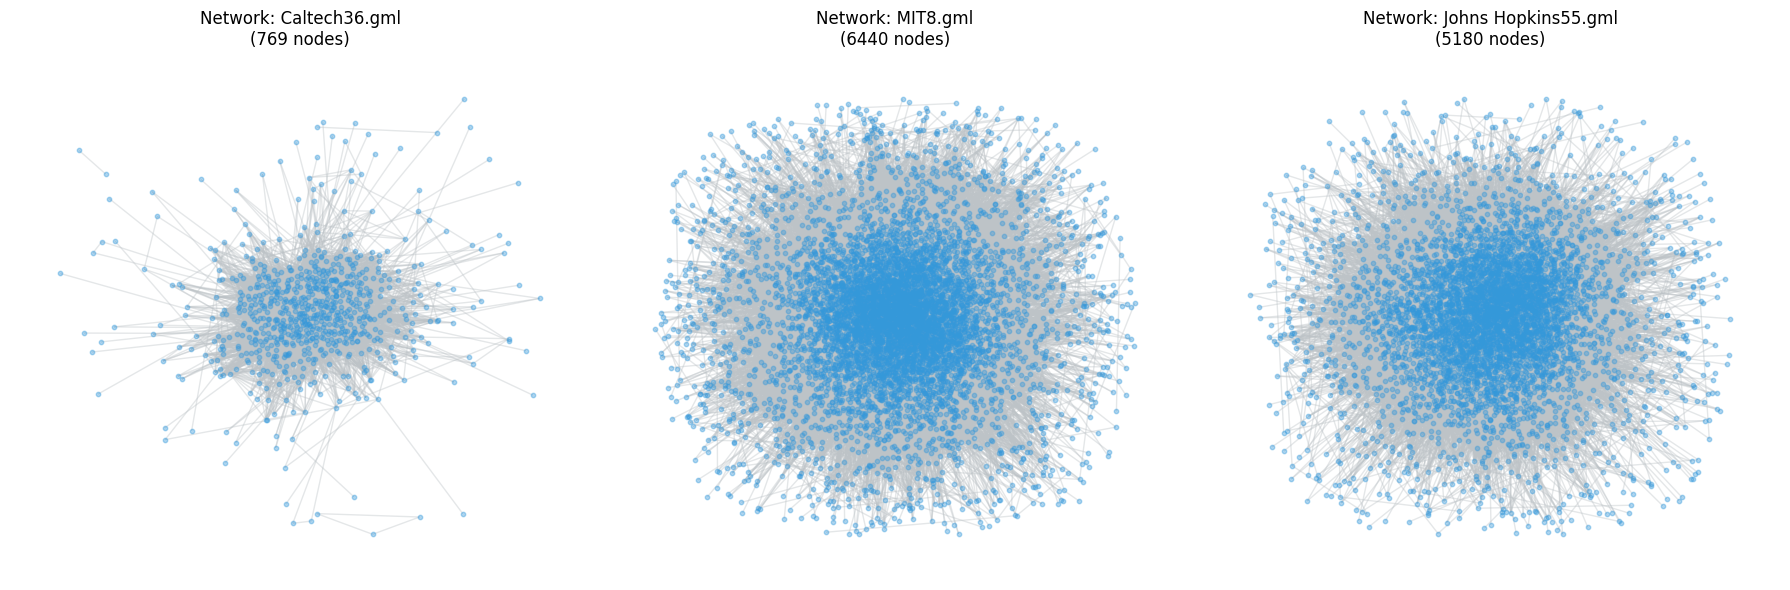

In [4]:
def plot_graphs(graphs_dict):
    """
    Takes the dictionary from the previous step and plots all graphs in it.
    """
    n = len(graphs_dict)
    if n == 0:
        print("No graphs found in the dictionary.")
        return

    # Create subplots dynamically based on the number of graphs in the dictionary
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 6))
    
    # Ensure axes is an array even if only 1 graph is plotted
    if n == 1:
        axes = [axes]

    for i, (name, G) in enumerate(graphs_dict.items()):
        print(f"Processing layout for {name}...")
        
        # Spring layout calculates positions for nodes
        pos = nx.spring_layout(G, k=0.1, iterations=15)
        
        nx.draw(G, pos, ax=axes[i], 
                node_size=10, 
                node_color='#3498db', 
                edge_color='#bdc3c7', 
                alpha=0.4, 
                with_labels=False)
        
        axes[i].set_title(f"Network: {name}\n({G.number_of_nodes()} nodes)", fontsize=12)

    plt.tight_layout()
    plt.show()

plot_graphs(my_graphs)

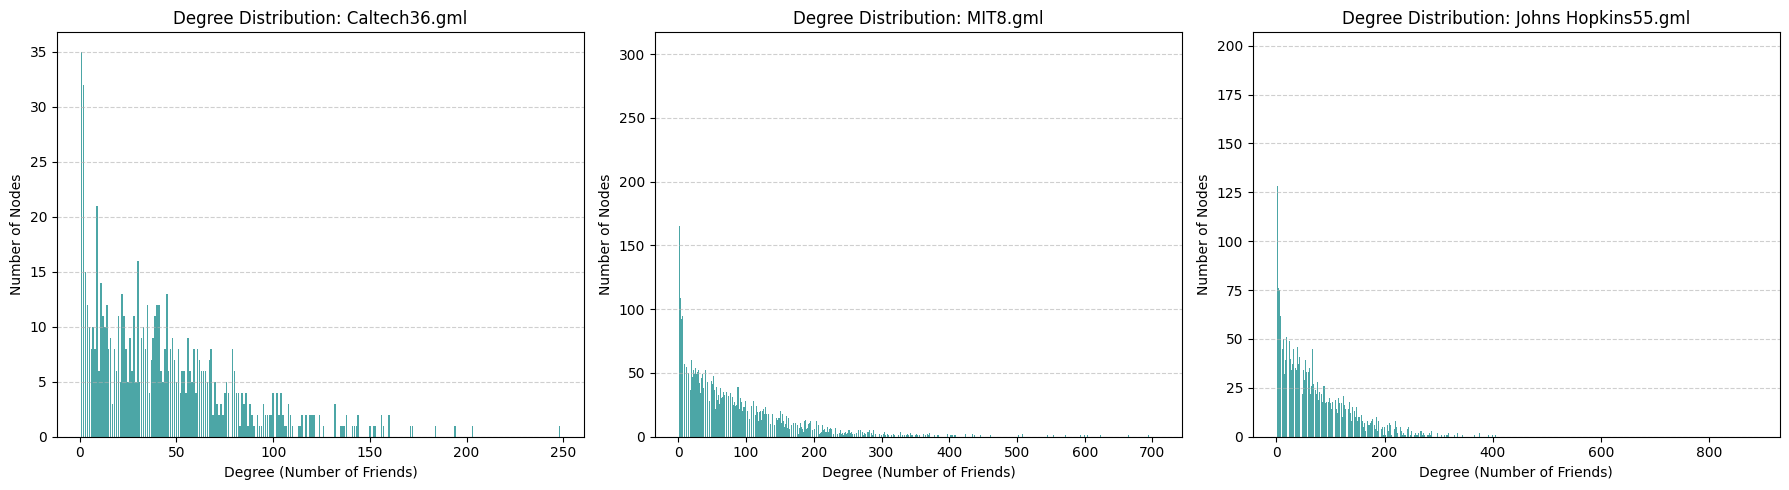

In [5]:
def plot_degree_distributions(graphs_dict):
    """
    Plots the degree distribution (histogram) for each graph in the dictionary.
    """
    n = len(graphs_dict)
    if n == 0:
        return

    fig, axes = plt.subplots(1, n, figsize=(6 * n, 5))
    
    # Ensure axes is iterable for a single graph
    if n == 1:
        axes = [axes]

    for i, (name, G) in enumerate(graphs_dict.items()):
        # 1. Get the list of degrees for all nodes
        degree_sequence = [d for n, d in G.degree()]
        
        # 2. Count frequencies of each degree
        degree_counts = collections.Counter(degree_sequence)
        deg, cnt = zip(*degree_counts.items())

        # 3. Plot as a bar chart
        axes[i].bar(deg, cnt, width=0.80, color='teal', alpha=0.7)
        
        axes[i].set_title(f"Degree Distribution: {name}")
        axes[i].set_xlabel("Degree (Number of Friends)")
        axes[i].set_ylabel("Number of Nodes")
        axes[i].grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# Use the output from your previous function call
plot_degree_distributions(my_graphs)

In [6]:
def analyze_topology(graphs_dict):
    print(f"{'Network':<20} | {'Global Clust.':<15} | {'Mean Local Clust.':<18} | {'Density':<10}")
    print("-" * 75)
    
    results = {}
    for name, G in graphs_dict.items():
        # 1. Global Clustering Coefficient (Transitivity)
        # Ratio of all actual triangles to all possible triples
        global_cc = nx.transitivity(G)
        
        # 2. Mean Local Clustering Coefficient
        # Average of the clustering coefficients of all individual nodes
        mean_local_cc = nx.average_clustering(G)
        
        # 3. Edge Density
        # Ratio of actual edges to maximum possible edges
        density = nx.density(G)
        
        results[name] = (global_cc, mean_local_cc, density)
        
        print(f"{name:<20} | {global_cc:<15.4f} | {mean_local_cc:<18.4f} | {density:<10.4f}")
    
    return results

# Execute the analysis on your pre-loaded graphs
metrics_results = analyze_topology(my_graphs)

Network              | Global Clust.   | Mean Local Clust.  | Density   
---------------------------------------------------------------------------
Caltech36.gml        | 0.2913          | 0.4093             | 0.0564    
MIT8.gml             | 0.1803          | 0.2712             | 0.0121    
Johns Hopkins55.gml  | 0.1932          | 0.2684             | 0.0139    


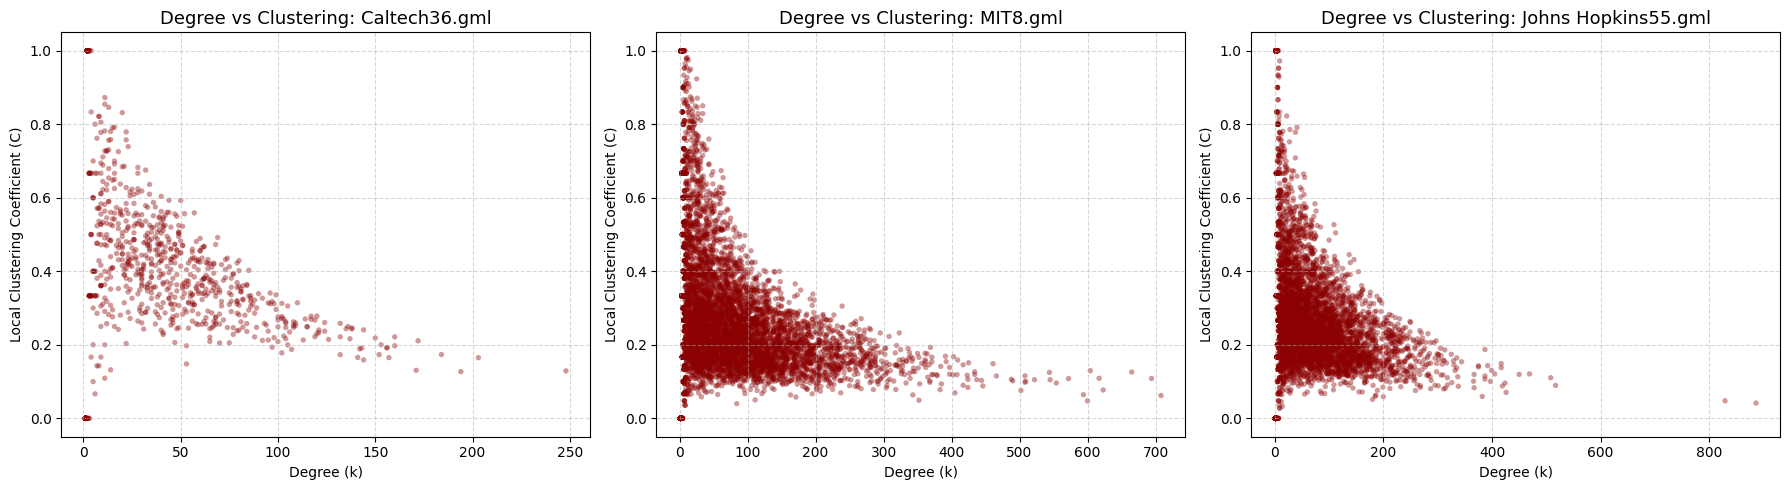

In [7]:
def plot_degree_vs_clustering(graphs_dict):
    """
    Generates scatter plots of Degree vs. Local Clustering Coefficient 
    for each graph in the dictionary.
    """
    n = len(graphs_dict)
    if n == 0:
        print("No graphs found to plot.")
        return

    # Create subplots side-by-side
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 5))
    
    # Ensure axes is an array if only 1 graph is present
    if n == 1:
        axes = [axes]

    for i, (name, G) in enumerate(graphs_dict.items()):
        # 1. Calculate degree and local clustering for every node
        # node_degrees is a dictionary: {node_id: degree_value}
        node_degrees = dict(G.degree())
        # node_clustering is a dictionary: {node_id: clustering_value}
        node_clustering = nx.clustering(G)
        
        # 2. Extract values into lists for plotting
        # We use G.nodes() to ensure the order of nodes matches in both lists
        x_degrees = [node_degrees[node] for node in G.nodes()]
        y_clustering = [node_clustering[node] for node in G.nodes()]
        
        # 3. Create the scatter plot
        axes[i].scatter(x_degrees, y_clustering, alpha=0.4, s=15, color='darkred', edgecolors='none')
        
        # Formatting the plot
        axes[i].set_title(f"Degree vs Clustering: {name}", fontsize=13)
        axes[i].set_xlabel("Degree (k)")
        axes[i].set_ylabel("Local Clustering Coefficient (C)")
        axes[i].grid(True, linestyle='--', alpha=0.5)
        
        # Optional: Add a trendline or log scale if the data is very spread out
        # axes[i].set_xscale('log') 

    plt.tight_layout()
    plt.show()

# Execute using your existing 'my_graphs' variable
plot_degree_vs_clustering(my_graphs)

Processing 50 networks...
Analysis complete. Plot saved as 'assortativity_analysis.png'.


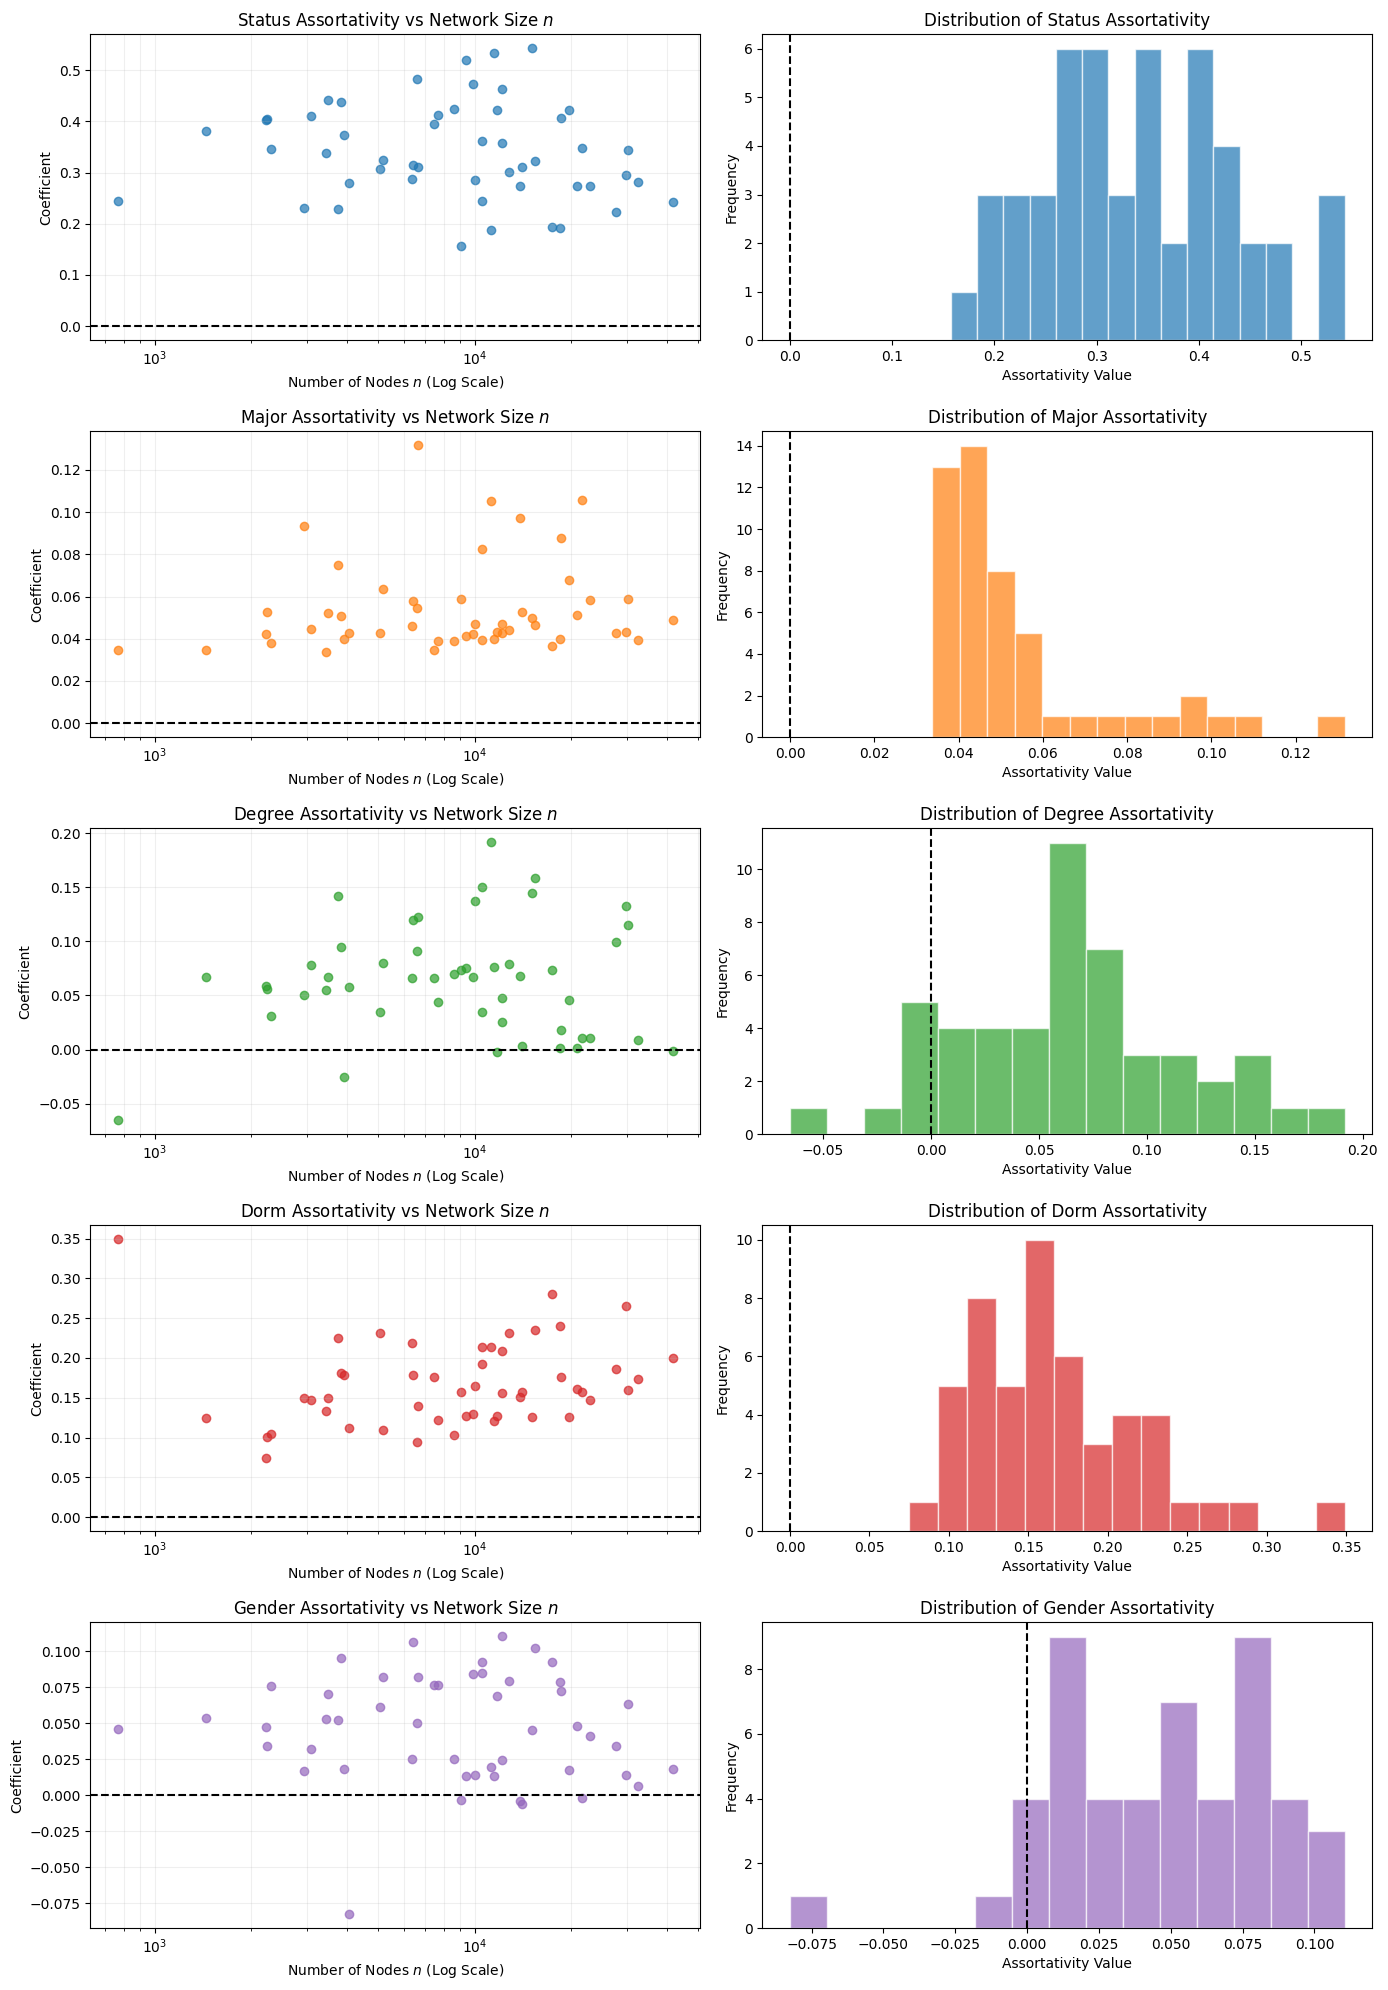

In [8]:
def analyze_assortativity(folder_path, num_files=40):
    # Lists to store metrics for plotting
    n_sizes = []
    status_assort = []
    major_assort = []
    degree_assort = []
    dorm_assort = []
    gender_assort = []
    
    # Get sorted list of GML files
    all_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.gml')])
    selected_files = all_files[:num_files]
    
    print(f"Processing {len(selected_files)} networks...")

    for file_name in selected_files:
        path = os.path.join(folder_path, file_name)
        try:
            G = nx.read_gml(path)
            
            # 1. Network size n
            n_sizes.append(G.number_of_nodes())
            
            # 2. Status (student/faculty)
            status_assort.append(nx.attribute_assortativity_coefficient(G, 'student_fac'))
            
            # 3. Major
            major_assort.append(nx.attribute_assortativity_coefficient(G, 'major_index'))
            
            # 4. Vertex Degree
            degree_assort.append(nx.degree_assortativity_coefficient(G))
            
            # 5. Dorm
            dorm_assort.append(nx.attribute_assortativity_coefficient(G, 'dorm'))
            
            # 6. Gender
            gender_assort.append(nx.attribute_assortativity_coefficient(G, 'gender'))
            
        except Exception as e:
            print(f"Skipping {file_name} due to error: {e}")

    # --- Plotting Configuration ---
    attr_names = ['Status', 'Major', 'Degree', 'Dorm', 'Gender']
    data_lists = [status_assort, major_assort, degree_assort, dorm_assort, gender_assort]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    fig, axes = plt.subplots(5, 2, figsize=(14, 20))

    for i in range(5):
        name = attr_names[i]
        vals = data_lists[i]
        
        # Scatter Plot (Assortativity vs n)
        axes[i, 0].scatter(n_sizes, vals, color=colors[i], alpha=0.7)
        axes[i, 0].set_xscale('log') # Log-linear axes as requested
        axes[i, 0].axhline(0, color='black', linestyle='--', linewidth=1.5, label='No Assortativity')
        axes[i, 0].set_title(f'{name} Assortativity vs Network Size $n$')
        axes[i, 0].set_xlabel('Number of Nodes $n$ (Log Scale)')
        axes[i, 0].set_ylabel('Coefficient')
        axes[i, 0].grid(True, which="both", ls="-", alpha=0.2)

        # Histogram (Distribution of values)
        axes[i, 1].hist(vals, bins=15, color=colors[i], alpha=0.7, edgecolor='white')
        axes[i, 1].axvline(0, color='black', linestyle='--', linewidth=1.5)
        axes[i, 1].set_title(f'Distribution of {name} Assortativity')
        axes[i, 1].set_xlabel('Assortativity Value')
        axes[i, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.savefig('assortativity_analysis.png')
    print("Analysis complete. Plot saved as 'assortativity_analysis.png'.")

# Run the analysis
data_folder =r"C:\Users\TEMMMAR\Desktop\M2 TRIED\projet Graph\fb100\data" 
analyze_assortativity(data_folder, num_files=50)

In [9]:
# Listing 1: Base Class Definition
class LinkPrediction:
    def __init__(self, graph):
        self.graph = graph

    def fit(self, X, y=None):
        return self

    def predict(self, X):
        """X is a list of node pairs [(u, v), ...]"""
        return np.array([self._score(u, v) for u, v in X])

    def _score(self, u, v):
        raise NotImplementedError("Subclasses must implement _score")

# 1. Common Neighbors
class CommonNeighbors(LinkPrediction):
    def _score(self, u, v):
        if not (self.graph.has_node(u) and self.graph.has_node(v)):
            return 0
        # Intersection of neighbor sets
        neighbors_u = set(self.graph.neighbors(u))
        neighbors_v = set(self.graph.neighbors(v))
        return len(neighbors_u.intersection(neighbors_v))

# 2. Jaccard Coefficient
class JaccardCoefficient(LinkPrediction):
    def _score(self, u, v):
        if not (self.graph.has_node(u) and self.graph.has_node(v)):
            return 0
        neighbors_u = set(self.graph.neighbors(u))
        neighbors_v = set(self.graph.neighbors(v))
        union = len(neighbors_u.union(neighbors_v))
        if union == 0:
            return 0
        # Intersection divided by Union
        return len(neighbors_u.intersection(neighbors_v)) / union

# 3. Adamic/Adar Index
class AdamicAdar(LinkPrediction):
    def _score(self, u, v):
        if not (self.graph.has_node(u) and self.graph.has_node(v)):
            return 0
        neighbors_u = set(self.graph.neighbors(u))
        neighbors_v = set(self.graph.neighbors(v))
        common = neighbors_u.intersection(neighbors_v)
        
        # Sum of 1 / log(degree of common neighbor)
        score = 0
        for node in common:
            degree = self.graph.degree(node)
            if degree > 1:
                score += 1.0 / np.log(degree)
        return score

In [32]:
def evaluate_on_subset(folder_path, num_graphs=15):
    all_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.gml')])
    selected_files = all_files[:num_graphs]
    
    results = {}

    for file_name in selected_files:
        G = nx.read_gml(os.path.join(folder_path, file_name))
        
        # Create test pairs: 50 existing edges (to predict) and 50 non-edges
        edges = list(G.edges())
        non_edges = list(nx.non_edges(G))
        
        test_samples = random.sample(edges, 50) + random.sample(non_edges, 50)
        
        # Run Metrics
        cn = CommonNeighbors(G)
        jc = JaccardCoefficient(G)
        aa = AdamicAdar(G)
        
        results[file_name] = {
            "CN": cn.predict(test_samples),
            "JC": jc.predict(test_samples),
            "AA": aa.predict(test_samples)
        }
        print(f"Evaluated {file_name}")

    return results

# Run the evaluation
eval_results = evaluate_on_subset(data_folder)

Evaluated American75.gml
Evaluated Amherst41.gml
Evaluated Auburn71.gml
Evaluated BC17.gml
Evaluated BU10.gml
Evaluated Baylor93.gml
Evaluated Berkeley13.gml
Evaluated Bingham82.gml
Evaluated Bowdoin47.gml
Evaluated Brandeis99.gml
Evaluated Brown11.gml
Evaluated Bucknell39.gml
Evaluated Cal65.gml
Evaluated Caltech36.gml
Evaluated Carnegie49.gml


In [33]:
eval_results

{'American75.gml': {'CN': array([10,  5,  2, 49, 36,  4, 17, 28, 28,  2,  2,  1,  1, 10, 26, 30, 17,
         14, 14, 35, 30, 10, 37, 16,  6, 12, 16,  1, 18, 17, 70,  3, 65,  2,
         16, 13,  6, 17, 31,  4, 12,  4, 17,  6, 88, 11,  1, 72, 23, 63,  0,
          2,  0,  1,  0,  0,  5,  0,  0,  1,  0,  0,  2,  0,  0,  0,  2,  0,
          0,  4,  0,  0,  0,  4,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,
          0,  0,  0,  3,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0]),
  'JC': array([0.16949153, 0.02427184, 0.02105263, 0.12531969, 0.26277372,
         0.13793103, 0.05841924, 0.14141414, 0.12844037, 0.00475059,
         0.02469136, 0.01219512, 0.00309598, 0.11111111, 0.10483871,
         0.09036145, 0.06049822, 0.07650273, 0.02922756, 0.12280702,
         0.12295082, 0.07692308, 0.36633663, 0.16      , 0.02097902,
         0.06417112, 0.05860806, 0.00729927, 0.09090909, 0.10493827,
         0.33492823, 0.01910828, 0.06268081, 0.01052632, 0.14285714,
         0.052     , 0.0625    

C:\Users\TEMMMAR\AppData\Local\Temp\ipykernel_12140\903152201.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([auc_scores["CN"], auc_scores["JC"], auc_scores["AA"]],


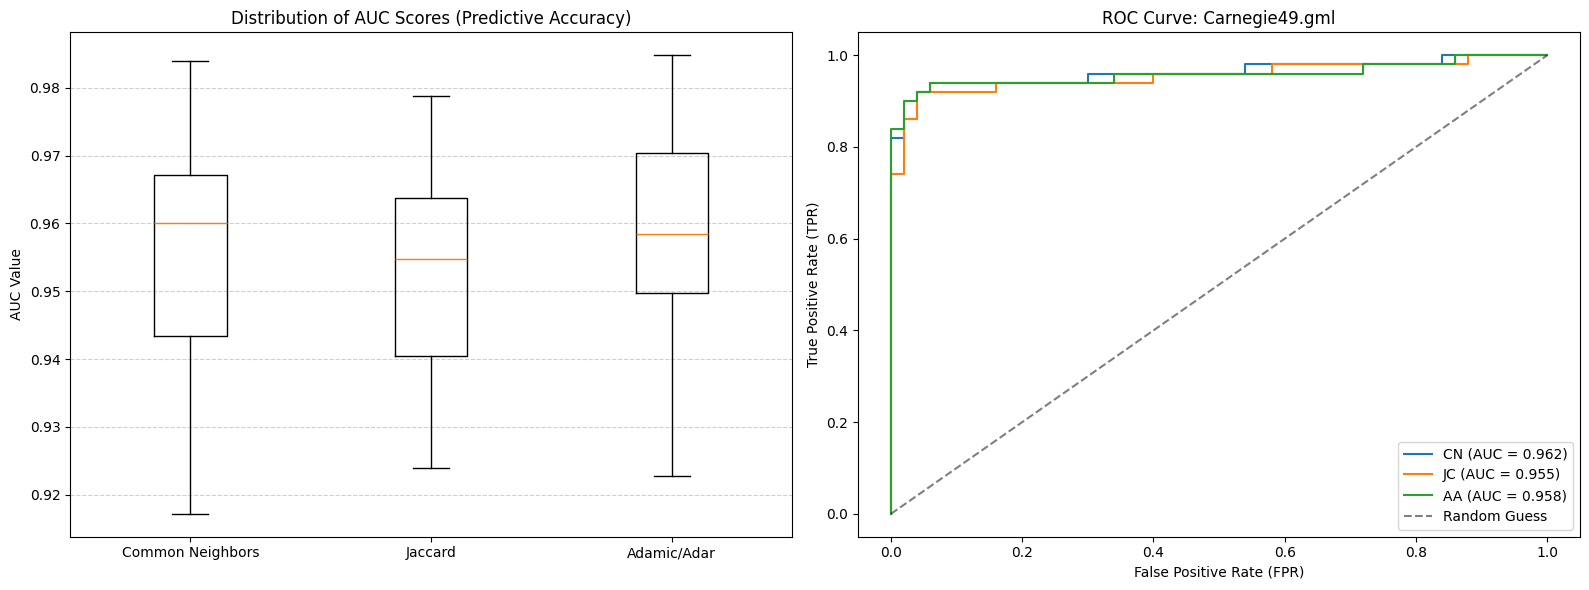

In [34]:
def calculate_roc_auc(y_true, scores):
    """Manually calculates ROC points and AUC score."""
    # Sort scores and corresponding truth values in descending order
    desc_score_indices = np.argsort(scores)[::-1]
    y_true = np.array(y_true)[desc_score_indices]
    
    tps = np.cumsum(y_true)
    fps = np.cumsum(1 - y_true)
    
    # TPR = TP / Total Positives; FPR = FP / Total Negatives
    tpr = tps / tps[-1]
    fpr = fps / fps[-1]
    
    # Prepend 0,0 for the start of the ROC curve
    tpr = np.insert(tpr, 0, 0)
    fpr = np.insert(fpr, 0, 0)
    
    # Calculate AUC using the Trapezoidal rule
    auc_score = np.trapz(tpr, fpr)
    
    return fpr, tpr, auc_score

def visualize_eval_results_no_sklearn(eval_results):
    auc_scores = {"CN": [], "JC": [], "AA": []}
    y_true = [1] * 50 + [0] * 50 # 50 edges, 50 non-edges

    # Prepare for plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Iterate through all graphs to aggregate AUCs
    for file_name, metrics in eval_results.items():
        for key in auc_scores.keys():
            _, _, score_auc = calculate_roc_auc(y_true, metrics[key])
            auc_scores[key].append(score_auc)

    # Plot 1: Boxplot of AUC Distributions
    ax1.boxplot([auc_scores["CN"], auc_scores["JC"], auc_scores["AA"]], 
                labels=["Common Neighbors", "Jaccard", "Adamic/Adar"])
    ax1.set_title("Distribution of AUC Scores (Predictive Accuracy)")
    ax1.set_ylabel("AUC Value")
    ax1.grid(axis='y', linestyle='--', alpha=0.6)

    # Plot 2: ROC Curve for the final network in the set
    last_file = list(eval_results.keys())[-1]
    for key in ["CN", "JC", "AA"]:
        fpr, tpr, score_auc = calculate_roc_auc(y_true, eval_results[last_file][key])
        ax2.plot(fpr, tpr, label=f'{key} (AUC = {score_auc:.3f})')
    
    ax2.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Guess')
    ax2.set_title(f"ROC Curve: {last_file}")
    ax2.set_xlabel("False Positive Rate (FPR)")
    ax2.set_ylabel("True Positive Rate (TPR)")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Run visualization
visualize_eval_results_no_sklearn(eval_results)

In [35]:
def run_link_prediction_experiment(G_original, fractions=[0.05, 0.1, 0.15, 0.2]):
    results = {}
    
    for f in fractions:
        # 1. Copy the graph to avoid modifying the original
        G_target = G_original.copy()
        edges = list(G_target.edges())
        num_to_remove = int(f * len(edges))
        
        # 2. Randomly remove edges
        E_removed = random.sample(edges, num_to_remove)
        G_target.remove_edges_from(E_removed)
        
        # 3. Define the Test Set (Removed edges vs. Non-existent edges)
        # We sample an equal number of non-edges for a balanced evaluation
        non_edges = list(nx.non_edges(G_original))
        E_negative = random.sample(non_edges, num_to_remove)
        
        test_pairs = E_removed + E_negative
        y_true = [1] * len(E_removed) + [0] * len(E_negative)
        
        # 4. Initialize Predictors on the modified graph
        predictors = {
            "CN": CommonNeighbors(G_target),
            "JC": JaccardCoefficient(G_target),
            "AA": AdamicAdar(G_target)
        }
        
        # 5. Compute predicted friendship scores
        current_f_results = {}
        for name, model in predictors.items():
            scores = model.predict(test_pairs)
            # Calculate AUC for this specific fraction
            _, _, auc_score = calculate_roc_auc(y_true, scores)
            current_f_results[name] = auc_score
            
        results[f] = current_f_results
        print(f"Completed evaluation for fraction f={f}")
        
    return results

# Example execution using one of your pre-loaded graphs
selected_graph = my_graphs['Caltech36.gml']
exp_results = run_link_prediction_experiment(selected_graph)

Completed evaluation for fraction f=0.05
Completed evaluation for fraction f=0.1
Completed evaluation for fraction f=0.15
Completed evaluation for fraction f=0.2


{0.05: {'CN': 0.941306571283284,
  'JC': 0.9383422129252958,
  'AA': 0.944380720691568},
 0.1: {'CN': 0.9371797022247472,
  'JC': 0.937717537357177,
  'AA': 0.9398104410717023},
 0.15: {'CN': 0.9346915482746485,
  'JC': 0.9314607811148838,
  'AA': 0.9388394622823959},
 0.2: {'CN': 0.9371376535174742,
  'JC': 0.9333829087145751,
  'AA': 0.9412224402173085}}

In [13]:
def evaluate_top_k(G_original, G_target, E_removed, k_values=[10, 50, 100]):
    """
    Sorts all non-existing edges in G_target by confidence p and 
    calculates how many were in E_removed.
    """
    # 1. Get all potential edges that do NOT exist in the training graph G_target
    # This includes both the edges we removed and the true non-edges.
    potential_edges = list(nx.non_edges(G_target))
    
    # Initialize our predictors
    predictors = {
        "CN": CommonNeighbors(G_target),
        "JC": JaccardCoefficient(G_target),
        "AA": AdamicAdar(G_target)
    }
    
    results = {}
    for name, model in predictors.items():
        # 2. Compute scores p for every potential pair
        # This acts as our confidence function p
        scores = model.predict(potential_edges)
        
        # 3. Sort in decreasing order of confidence
        # Zip pairs with scores and sort by score descending
        ranked_predictions = sorted(zip(potential_edges, scores), key=lambda x: x[1], reverse=True)
        
        # 4. Evaluate Precision at top k
        precision_results = {}
        removed_set = set(E_removed)
        
        for k in k_values:
            # Take the first k pairs
            top_k_pairs = [pair for pair, score in ranked_predictions[:k]]
            
            # Count how many of top_k were actually removed edges
            hits = len([pair for pair in top_k_pairs if pair in removed_set or (pair[1], pair[0]) in removed_set])
            precision_results[k] = hits / k
            
        results[name] = precision_results
        
    return results


G_original = my_graphs['Caltech36.gml'].copy()

# 2. Define the fraction of edges to remove (e.g., 10%)
f = 0.1
edges = list(G_original.edges())
num_to_remove = int(f * len(edges))

# 3. Randomly select and remove the edges
E_removed = random.sample(edges, num_to_remove)
G_target = G_original.copy()
G_target.remove_edges_from(E_removed)

# 4. Now you can safely run the evaluation
precision_stats = evaluate_top_k(G_original, G_target, E_removed)

# Print the results
for metric, k_values in precision_stats.items():
    print(f"--- {metric} ---")
    for k, score in k_values.items():
        print(f"Precision@{k}: {score:.4f}")

--- CN ---
Precision@10: 0.8000
Precision@50: 0.6000
Precision@100: 0.5900
--- JC ---
Precision@10: 0.0000
Precision@50: 0.3000
Precision@100: 0.3600
--- AA ---
Precision@10: 0.8000
Precision@50: 0.6400
Precision@100: 0.6000


In [14]:
def calculate_topk_metrics(ranked_predictions, E_removed, k_values):
    """
    Computes precision@k, recall@k, and top@k predictive rate.
    
    ranked_predictions: List of ((u, v), score) sorted by score descending.
    E_removed: Set of ground-truth edges that were removed.
    k_values: List of k to evaluate [50, 100, 200, ..., 400].
    """
    # Use sets for O(1) lookups; handle undirected pairs
    ground_truth = set()
    for u, v in E_removed:
        ground_truth.add(tuple(sorted((u, v))))
    
    total_removed = len(ground_truth)
    results = []

    for k in k_values:
        # Take the k best scored edges
        E_predict_top_k = [tuple(sorted(pair)) for pair, score in ranked_predictions[:k]]
        
        # Calculate Intersection: |E_removed ∩ E_predict_top_k|
        true_positives = [edge for edge in E_predict_top_k if edge in ground_truth]
        tp_count = len(true_positives)
        
        # 1. Precision@k = |TP| / k (since |TP| + |FP| is always k in top-k analysis)
        precision = tp_count / k
        
        # 2. Recall@k = |TP| / |E_removed| (since |TP| + |FN| is total removed edges)
        recall = tp_count / total_removed if total_removed > 0 else 0
        
        # 3. Top@k Predictive Rate (Percentage of correctly classified positive samples)
        top_k_rate = (tp_count / k) * 100
        
        results.append({
            'k': k,
            'TP': tp_count,
            'Precision': precision,
            'Recall': recall,
            'Top@k_Rate': top_k_rate
        })
        
    return results


In [15]:
# 1. Prepare the Data (Using Caltech36 as an example)
G_original = my_graphs['Caltech36.gml'].copy()
f = 0.1  # Remove 10% of edges
edges = list(G_original.edges())
E_removed = random.sample(edges, int(f * len(edges)))

G_target = G_original.copy()
G_target.remove_edges_from(E_removed)

# 2. Generate Ranked Predictions
# We use AdamicAdar as the predictor 'p'
predictor = AdamicAdar(G_target)
potential_edges = list(nx.non_edges(G_target))

# Calculate scores for all potential pairs
scores = predictor.predict(potential_edges)

# Sort in decreasing order of confidence p
ranked_predictions = sorted(zip(potential_edges, scores), key=lambda x: x[1], reverse=True)

# 3. Compute Top@k, Precision@k, and Recall@k
k_list = [50, 100, 200, 300, 400]
results = calculate_topk_metrics(ranked_predictions, E_removed, k_list)

# 4. Display Results
print(f"{'k':<5} | {'TP':<5} | {'Precision':<10} | {'Recall':<10} | {'Top@k Rate'}")
print("-" * 55)
for res in results:
    print(f"{res['k']:<5} | {res['TP']:<5} | {res['Precision']:<10.4f} | {res['Recall']:<10.4f} | {res['Top@k_Rate']:.2f}%")

k     | TP    | Precision  | Recall     | Top@k Rate
-------------------------------------------------------
50    | 33    | 0.6600     | 0.0198     | 66.00%
100   | 58    | 0.5800     | 0.0348     | 58.00%
200   | 111   | 0.5550     | 0.0667     | 55.50%
300   | 143   | 0.4767     | 0.0859     | 47.67%
400   | 173   | 0.4325     | 0.1039     | 43.25%


In [16]:
from sklearn.metrics import roc_auc_score

def evaluate_predictors(G, name):
    # 1. Create a test set by removing 10% of existing edges
    all_edges = list(G.edges())
    num_to_remove = int(0.1 * len(all_edges))
    removed_edges = random.sample(all_edges, num_to_remove)
    
    # Create training graph
    G_train = G.copy()
    G_train.remove_edges_from(removed_edges)
    
    # 2. Define non-edges (potential future links) for evaluation
    non_edges = list(nx.non_edges(G))
    negative_samples = random.sample(non_edges, num_to_remove)
    
    # Combined test samples and true labels (1 for real edge, 0 for non-edge)
    test_samples = removed_edges + negative_samples
    y_true = [1] * num_to_remove + [0] * num_to_remove

    # 3. Compute Metrics
    results = {}
    
    # Common Neighbors (Manual calculation as NetworkX returns iterator)
    results['Common Neighbors'] = [len(list(nx.common_neighbors(G_train, u, v))) for u, v in test_samples]
    
    # Jaccard Coefficient
    jc_preds = nx.jaccard_coefficient(G_train, test_samples)
    results['Jaccard'] = [p for u, v, p in jc_preds]
    
    # Adamic/Adar Index
    aa_preds = nx.adamic_adar_index(G_train, test_samples)
    results['Adamic/Adar'] = [p for u, v, p in aa_preds]

    # 4. Calculate AUC for each
    print(f"\n--- Evaluation for {name} ---")
    for metric, scores in results.items():
        auc = roc_auc_score(y_true, scores)
        print(f"{metric} AUC: {auc:.4f}")

# Example Usage 
evaluate_predictors(my_graphs['Caltech36.gml'], "Caltech")
evaluate_predictors(my_graphs['MIT8.gml'], "MIT")

c:\Users\TEMMMAR\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\TEMMMAR\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (



--- Evaluation for Caltech ---
Common Neighbors AUC: 0.9324
Jaccard AUC: 0.9338
Adamic/Adar AUC: 0.9364

--- Evaluation for MIT ---
Common Neighbors AUC: 0.9595
Jaccard AUC: 0.9636
Adamic/Adar AUC: 0.9627


In [ ]:
import torch
import networkx as nx
import numpy as np
import random

def label_propagation(G, attribute_name, alpha=0.9, max_iter=100):
    nodes = sorted(G.nodes())
    node_to_idx = {node: i for i, node in enumerate(nodes)}
    num_nodes = len(nodes)
    
    # Extract labels and classes
    labels = nx.get_node_attributes(G, attribute_name)
    if not labels:
        return {node: None for node in nodes} # Return empty if attribute missing
        
    unique_labels = sorted(list(set(labels.values())))
    label_to_idx = {label: i for i, label in enumerate(unique_labels)}
    num_classes = len(unique_labels)
    
    # 1. Initialize Label Matrix Y and F
    Y = torch.zeros((num_nodes, num_classes))
    is_labeled = torch.zeros(num_nodes, dtype=torch.bool)
    
    for node, label in labels.items():
        idx = node_to_idx[node]
        Y[idx, label_to_idx[label]] = 1
        is_labeled[idx] = True
        
    # 2. Create Transition Matrix P = D^-1 * A
    adj = nx.adjacency_matrix(G, nodelist=nodes).toarray()
    adj = torch.from_numpy(adj).float()
    deg = torch.sum(adj, dim=1)
    deg_inv = torch.where(deg > 0, 1.0 / deg, torch.zeros_like(deg))
    P = torch.diag(deg_inv) @ adj
    
    # 3. Iterative Propagation (The missing 'F' logic)
    F = Y.clone()
    for _ in range(max_iter):
        F_old = F.clone()
        # Propagate: F = alpha * P * F + (1-alpha) * Y
        F = alpha * (P @ F) + (1 - alpha) * Y
        
        # Clamp: Labeled nodes must keep their ground truth
        F[is_labeled] = Y[is_labeled]
        
        # Check for convergence
        if torch.norm(F - F_old) < 1e-5:
            break
            
    # 4. Prediction
    predicted_indices = torch.argmax(F, dim=1)
    predictions = {nodes[i]: unique_labels[predicted_indices[i]] for i in range(num_nodes)}
    
    return predictions

def run_classification_experiment(G, attributes=['dorm', 'major_index', 'gender']):
    fractions = [0.1, 0.2, 0.3]
    results = {attr: {} for attr in attributes}
    
    for attr in attributes:
        original_labels = nx.get_node_attributes(G, attr)
        if not original_labels: continue
            
        all_nodes = list(original_labels.keys())
        for f in fractions:
            num_to_hide = int(f * len(all_nodes))
            nodes_to_hide = random.sample(all_nodes, num_to_hide)
            
            G_temp = G.copy()
            for node in nodes_to_hide:
                if attr in G_temp.nodes[node]:
                    del G_temp.nodes[node][attr]
            
            preds = label_propagation(G_temp, attr)
            
            # Accuracy (Equation 1)
            y_true = [original_labels[node] for node in nodes_to_hide]
            y_pred = [preds[node] for node in nodes_to_hide]
            accuracy = sum(1 for i in range(len(y_true)) if y_true[i] == y_pred[i]) / len(y_true)
            results[attr][f] = accuracy
            
    return results

# Example execution
classification_results = run_classification_experiment(my_graphs['Caltech36.gml'])


In [22]:
classification_results

{'dorm': {0.1: 0.7236842105263158,
  0.2: 0.7320261437908496,
  0.3: 0.7565217391304347},
 'major_index': {0.1: 0.2236842105263158,
  0.2: 0.2549019607843137,
  0.3: 0.21304347826086956},
 'gender': {0.1: 0.47368421052631576,
  0.2: 0.5816993464052288,
  0.3: 0.6173913043478261}}

In [26]:
import torch
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

def label_propagation(G, attribute_name, alpha=0.9, max_iter=100):
    """
    Implementation of Label Propagation for categorical node attributes.
    """
    nodes = sorted(G.nodes())
    node_to_idx = {node: i for i, node in enumerate(nodes)}
    num_nodes = len(nodes)
    
    # Extract existing labels
    labels = nx.get_node_attributes(G, attribute_name)
    if not labels: return None
        
    unique_labels = sorted(list(set(labels.values())))
    num_classes = len(unique_labels)
    label_to_idx = {label: i for i, label in enumerate(unique_labels)}
    
    # Initialize Matrices
    Y = torch.zeros((num_nodes, num_classes))
    is_labeled = torch.zeros(num_nodes, dtype=torch.bool)
    
    for node, label in labels.items():
        idx = node_to_idx[node]
        Y[idx, label_to_idx[label]] = 1
        is_labeled[idx] = True
        
    # Transition Matrix P = D^-1 * A
    adj = nx.adjacency_matrix(G, nodelist=nodes).toarray()
    adj = torch.from_numpy(adj).float()
    deg = torch.sum(adj, dim=1)
    deg_inv = torch.where(deg > 0, 1.0 / deg, torch.zeros_like(deg))
    P = torch.diag(deg_inv) @ adj
    
    # Iterative Propagation
    F = Y.clone()
    for _ in range(max_iter):
        F_old = F.clone()
        F = alpha * (P @ F) + (1 - alpha) * Y
        F[is_labeled] = Y[is_labeled] # Clamp ground truth
        if torch.norm(F - F_old) < 1e-5: break
            
    # Final label assignment
    predicted_indices = torch.argmax(F, dim=1)
    return {nodes[i]: unique_labels[predicted_indices[i]] for i in range(num_nodes)}

def run_evaluation(G, attributes=['dorm', 'major_index', 'year', 'gender']):
    fractions = [0.1, 0.2, 0.3, 0.4]
    results = {attr: [] for attr in attributes}
    
    for attr in attributes:
        original_labels = nx.get_node_attributes(G, attr)
        all_nodes = list(original_labels.keys())
        
        for f in fractions:
            # Hide a fraction of labels
            nodes_to_hide = random.sample(all_nodes, int(f * len(all_nodes)))
            G_temp = G.copy()
            for node in nodes_to_hide:
                if attr in G_temp.nodes[node]: del G_temp.nodes[node][attr]
            
            # Predict missing labels
            preds = label_propagation(G_temp, attr)
            
            # Accuracy (Eq. 1): 1/n * sum(indicator(y_hat == y))
            y_true = [original_labels[node] for node in nodes_to_hide]
            y_pred = [preds[node] for node in nodes_to_hide]
            accuracy = sum(1 for i in range(len(y_true)) if y_true[i] == y_pred[i]) / len(y_true)
            results[attr].append(accuracy)
            
    return fractions, results

# Example execution
fractions, eval_results = run_evaluation(my_graphs['Caltech36.gml'])

In [28]:
eval_results

{'dorm': [0.6973684210526315,
  0.6862745098039216,
  0.7260869565217392,
  0.7003257328990228],
 'major_index': [0.21052631578947367,
  0.23529411764705882,
  0.18695652173913044,
  0.1465798045602606],
 'year': [0.7105263157894737,
  0.6993464052287581,
  0.6695652173913044,
  0.5863192182410424],
 'gender': [0.6052631578947368,
  0.5620915032679739,
  0.5869565217391305,
  0.5960912052117264]}

In [30]:
import networkx as nx
import random
from networkx.algorithms.community import greedy_modularity_communities
from sklearn.metrics import normalized_mutual_info_score

def validate_with_random_graphs(graphs_dict, num_graphs=5):
    # 1. Select 5 random graphs from the loaded dictionary
    all_keys = list(graphs_dict.keys())
    if len(all_keys) < num_graphs:
        selected_names = all_keys
    else:
        selected_names = random.sample(all_keys, num_graphs)
    
    print(f"{'Graph':<20} | {'DORM (NMI)':<15} | {'YEAR (NMI)':<15} | {'MAJOR (NMI)':<15}")
    print("-" * 75)

    for name in selected_names:
        G = graphs_dict[name]
        
        # 2. Run Community Detection (Topology only)
        # Using Greedy Modularity (standard in NetworkX)
        # Note: This finds groups based ONLY on edges, not attributes.
        pred_communities = list(greedy_modularity_communities(G))
        
        # Create a mapping: Node ID -> Community ID
        community_map = {}
        for idx, comm in enumerate(pred_communities):
            for node in comm:
                community_map[node] = idx
        
        # 3. Align Ground Truth Labels with Prediction
        nodes = list(G.nodes())
        preds = [community_map.get(n) for n in nodes]
        
        # Extract attributes (handle missing values with -1)
        dorms = nx.get_node_attributes(G, 'dorm')
        years = nx.get_node_attributes(G, 'year')
        majors = nx.get_node_attributes(G, 'major_index')
        
        true_dorms = [dorms.get(n, -1) for n in nodes]
        true_years = [years.get(n, -1) for n in nodes]
        true_majors = [majors.get(n, -1) for n in nodes]
        
        # 4. Compute NMI Score (0.0 = No correlation, 1.0 = Perfect match)
        nmi_dorm = normalized_mutual_info_score(true_dorms, preds)
        nmi_year = normalized_mutual_info_score(true_years, preds)
        nmi_major = normalized_mutual_info_score(true_majors, preds)
        
        print(f"{name:<20} | {nmi_dorm:<15.4f} | {nmi_year:<15.4f} | {nmi_major:<15.4f}")

# Execute the validation
# Assumes 'my_graphs' contains your loaded .gml files
validate_with_random_graphs(my_graphs, num_graphs=5)

Graph                | DORM (NMI)      | YEAR (NMI)      | MAJOR (NMI)    
---------------------------------------------------------------------------
Caltech36.gml        | 0.3347          | 0.1012          | 0.0692         
MIT8.gml             | 0.1029          | 0.2013          | 0.0482         
Johns Hopkins55.gml  | 0.0830          | 0.1340          | 0.0563         
